# cluster, kmeans

* kmeans 데이터의 영역을 대표하는 클러스터의 중심을 찾는 방법
    * k개의 임의의 중심점을 배치
    * 각 데이터들을 가장 가까운 중심점으로 묶는다.
    * 각 클러스터의 중심점을 구한 후, 중심점에서 가장 가까운 데이터들을 묶는다.
    * 각 클러스터가 변하지 않을 때까지 반복.

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [185]:
# n_cluster를 지정하지 않으면 8개가 기본이다. 
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(f"{kmeans.labels_}")
print(f"중심점 : {kmeans.cluster_centers_}")
print(f"응집도 : {kmeans.inertia_}")
print(kmeans.score(X))

[0 0 0 1 1 1]
중심점 : [[ 1.  2.]
 [10.  2.]]
응집도 : 16.0
-16.0


# 최적의 k-value

* cluster 개수를 1씩 늘려가면서 응집도 값 변화를 확인
* 응집도 변화가 거의 존재하지 않는 곳이 적절한 클러스터로 판단

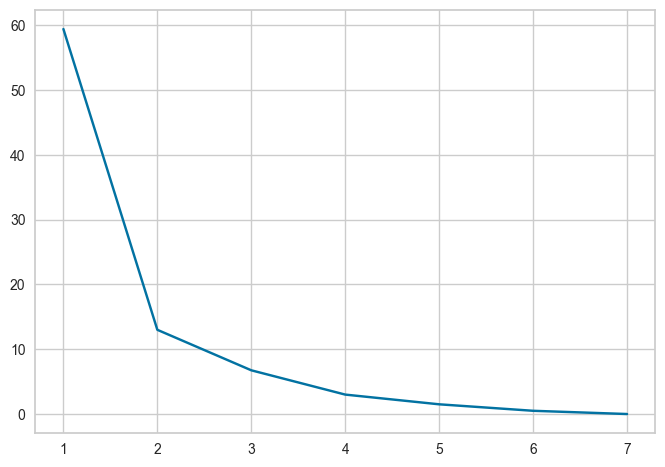

In [189]:
fruit = np.array([[3, 4], [1, 5], [7, 9], [5, 4], [6, 8], [2, 3], [4, 4]])
temp = []
for i in range(1, 8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(fruit)
    temp.append(kmeans.inertia_)

plt.plot(range(1, 8), temp)
plt.show()

# yellowbrick으로 최적의 k-value 찾기

* yellowbrick의 KElbowVisualizer를 활용, 최적의 k-value 찾기

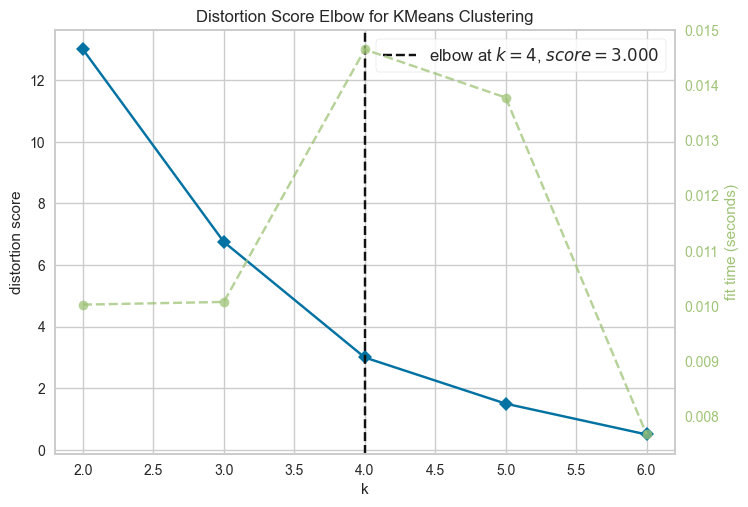

In [192]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
fruit = np.array([[3, 4], [1, 5], [7, 9], [5, 4], [6, 8], [2, 3], [4, 4]])

visualizer = KElbowVisualizer(KMeans(), k=(2, 7))
visualizer.fit(fruit)
visualizer.show()
plt.show()

# Hierarchical clustering

* 비슷한 군집끼리 묶어가면서 최종적으로 하나의 군집으로 묶여질 때 까지 묶어나가는 알고리즘
* 군집간의 거리를 바탕으로 묶어주며, K-means와 다르게 군집의 수를 미리 정하지 않아도 된다.

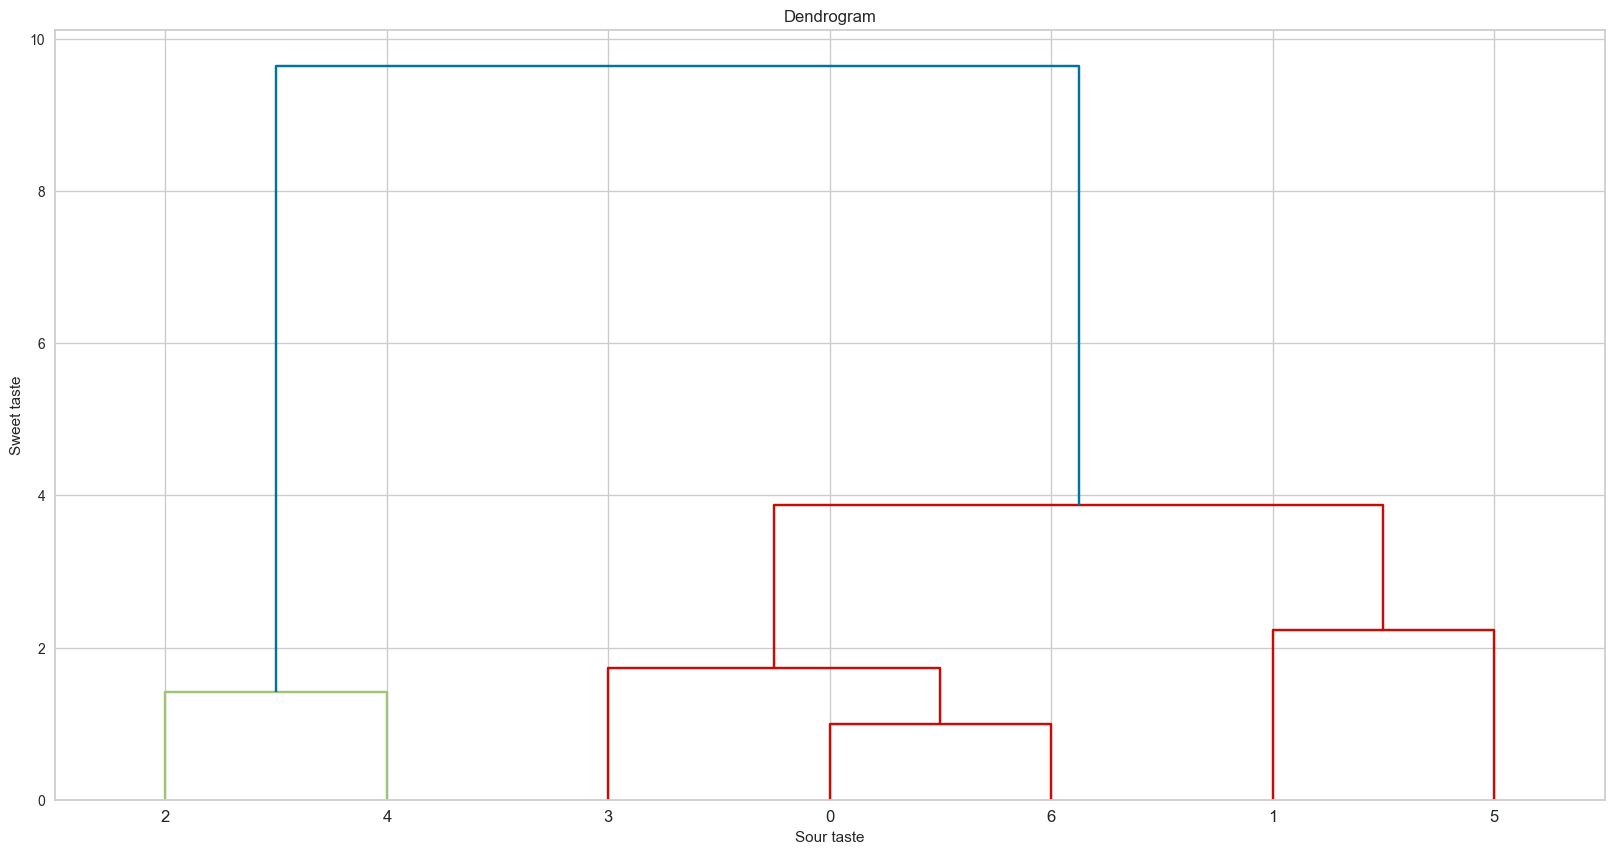

In [196]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
fruit = np.array([[3, 4], [1, 5], [7, 9], [5, 4], [6, 8], [2, 3], [4, 4]])
plt.figure(figsize=(20, 10))
cluster = linkage(fruit, method="ward")

dendrogram = dendrogram(cluster)
plt.title("Dendrogram")
plt.xlabel("Sour taste")
plt.ylabel("Sweet taste")
plt.show()

In [197]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
cluster.fit_predict(fruit)

array([0, 0, 1, 0, 1, 0, 0])

----

# clustering을 활용, 쇼핑몰 회원 세분화

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [201]:
df = pd.read_csv('./data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* 회원의 나이는 20대 후반에서 40대 후반이 주요고객
* 연 소득은 41,500 ~ 78,000 달러
* 쇼핑몰 점수는 34.75 ~ 73점 부근 

In [204]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* 30대 초~중반까지가 다수, 20대 초반 ~ 20대 후가 그 뒤를 따른다

C:\Users\hjoon\AppData\Local\Temp\ipykernel_2716\1181022293.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], bins=20)


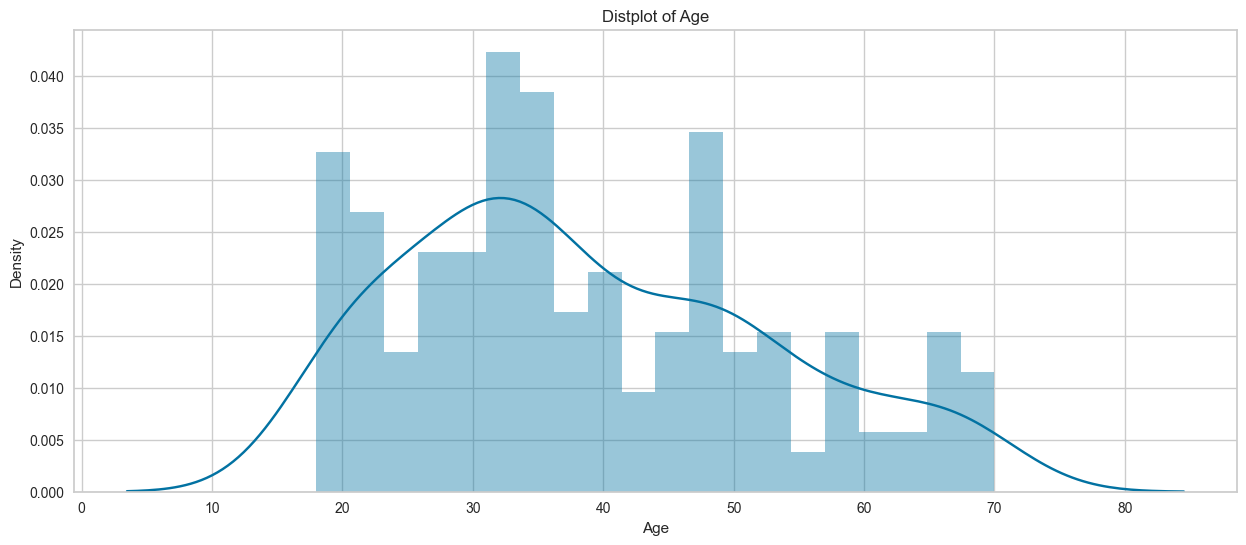

In [207]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df["Age"], bins=20)
plt.title("Distplot of Age")
plt.show()

* 회원들의 연간 소득 분포는 65,000 ~ 75,000 달러가 가장 많았다.

C:\Users\hjoon\AppData\Local\Temp\ipykernel_2716\849641760.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"], bins=20)


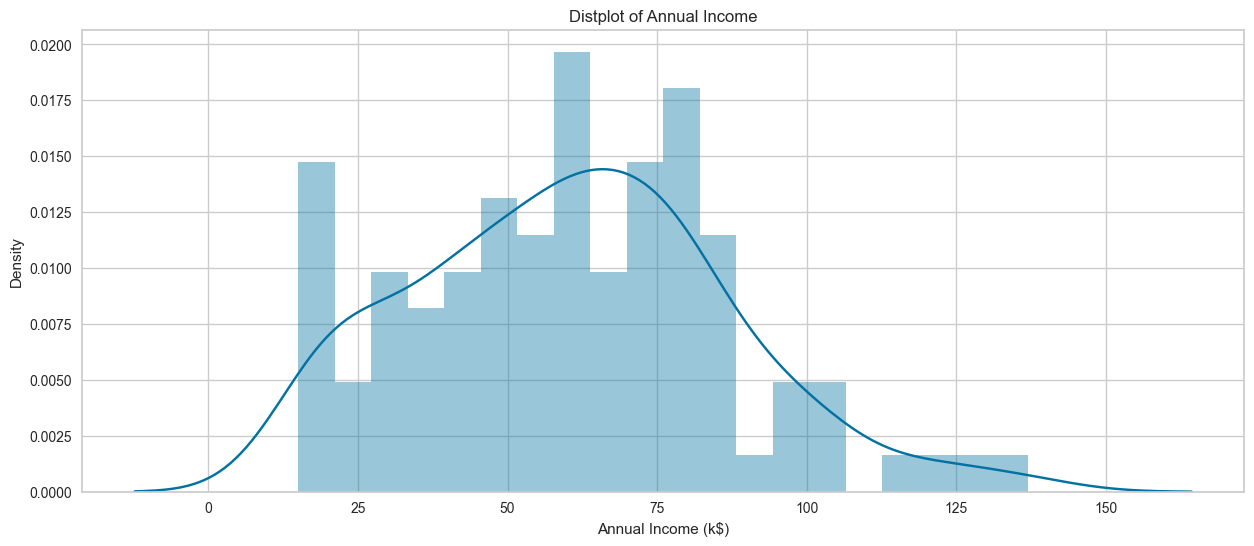

In [209]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df["Annual Income (k$)"], bins=20)
plt.title("Distplot of Annual Income")
plt.show()

* 쇼핑몰 점수는 약 40~60점이 가장 많은 것을 확인

C:\Users\hjoon\AppData\Local\Temp\ipykernel_2716\3154220483.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Spending Score (1-100)"], bins=20)


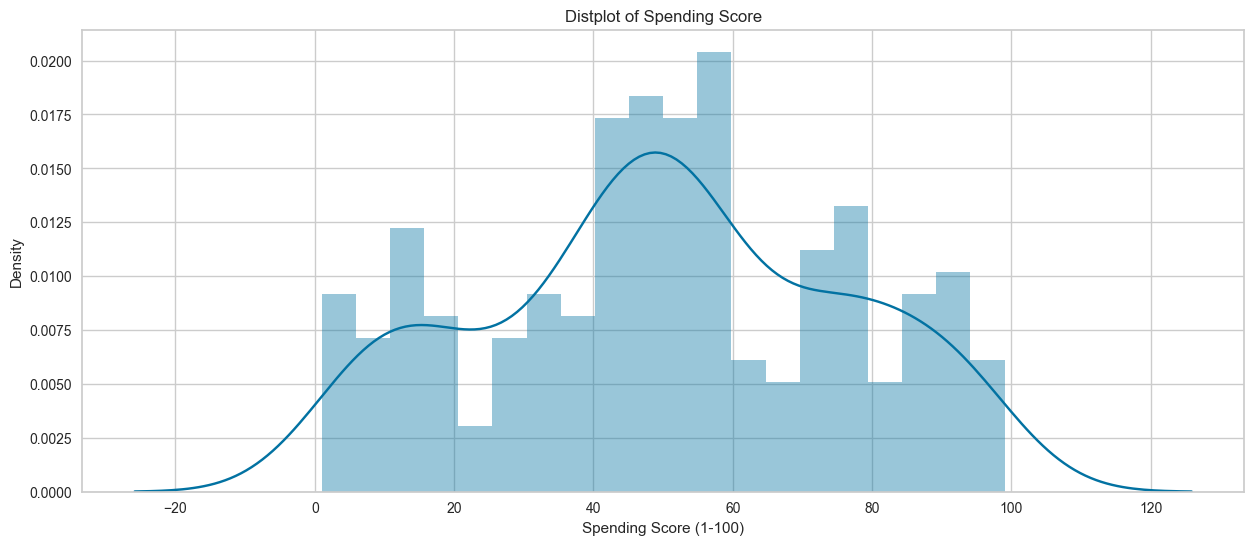

In [211]:
plt.figure(1, figsize=(15, 6))
sns.distplot(df["Spending Score (1-100)"], bins=20)
plt.title("Distplot of Spending Score")
plt.show()

* 성비는 여성이 더 많음

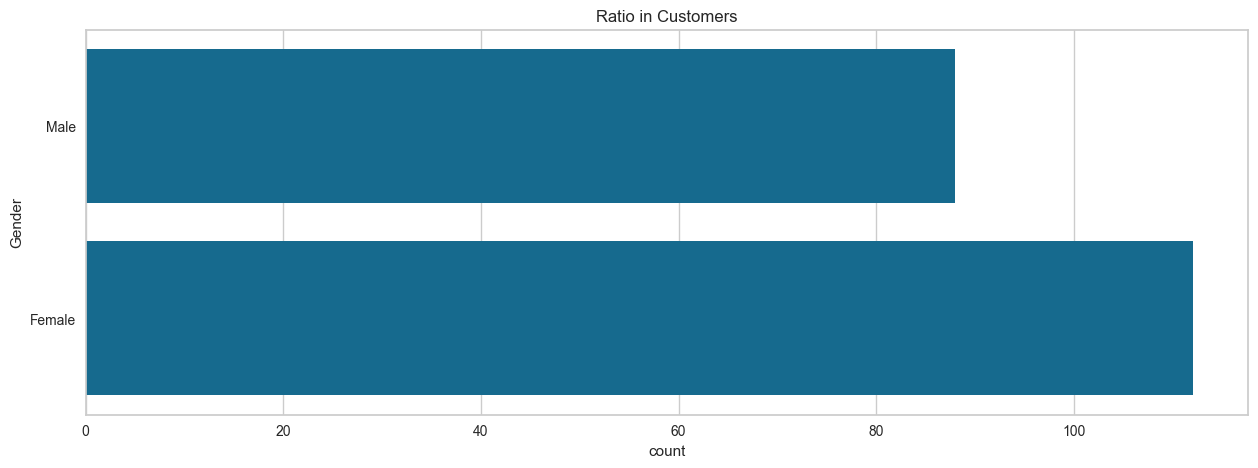

In [213]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y = "Genre", data = df)
plt.title("Ratio in Customers")
plt.ylabel("Gender")
plt.show()

* 성별에 따른 나이와 연간 수입을 알아보자

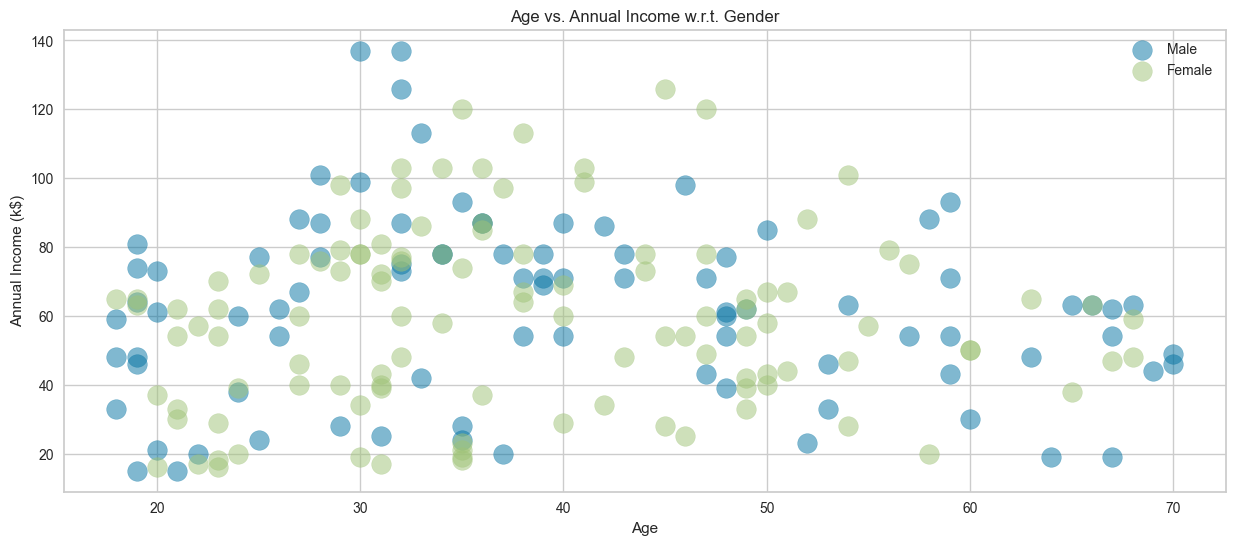

In [217]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(x = "Age", y = "Annual Income (k$)", data = df[df['Genre'] == gender], s=200, alpha = 0.5, label = gender)
plt.xlabel("Age"), plt.ylabel("Annual Income (k$)")
plt.title("Age vs. Annual Income w.r.t. Gender")
plt.legend()
plt.show()

* 여성이 30대에 많이 분포되어있고, 남자는 20대 초반 ~ 30대까지 얇게 분포

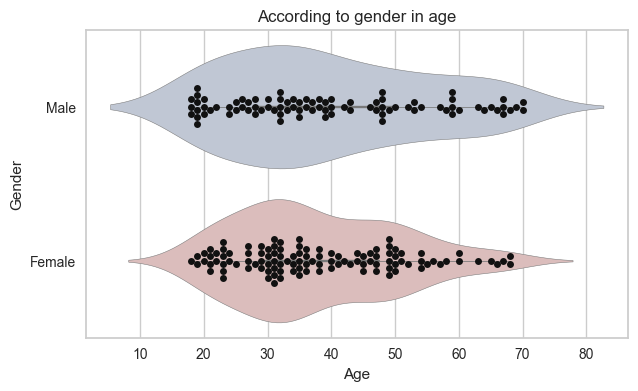

In [222]:
plt.figure(1, figsize=(7, 4))

sns.violinplot(x='Age', y='Genre', data = df, palette="vlag", hue="Genre", legend=False)
sns.swarmplot(x = "Age", y = "Genre", data = df, color="k")
plt.ylabel("Gender")
plt.title("According to gender in age")
plt.show()

* 여성은 약 40,000 달러 ~ 70,000 달러 사이 분포
* 남성은 약 50,000 달러 ~ 80,000 달러 사이 분포 

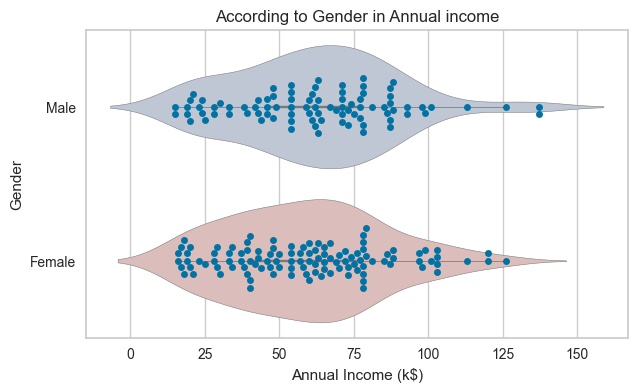

In [225]:
plt.figure(1, figsize=(7, 4))
sns.violinplot(x='Annual Income (k$)', y='Genre', data = df, palette="vlag", hue="Genre", legend=False)
sns.swarmplot(x = "Annual Income (k$)", y = "Genre", data = df)
plt.ylabel("Gender")
plt.title("According to Gender in Annual income")
plt.show()

* 성별에 따른 쇼핑몰 점수는 크게 차이 없이 40-60점 사이가 가장 많은 것으로 나타남 

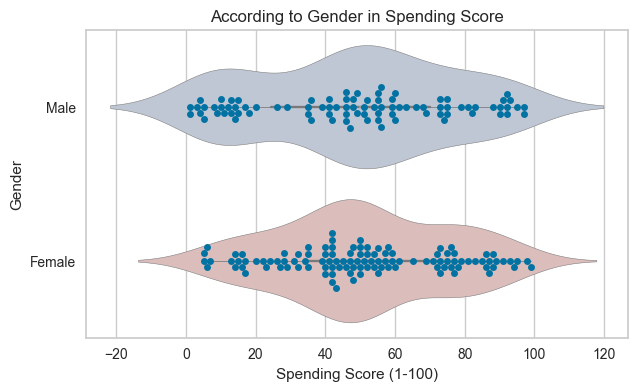

In [227]:
plt.figure(1, figsize=(7, 4))

sns.violinplot(x='Spending Score (1-100)', y='Genre', data = df, palette="vlag", hue="Genre", legend=False)
sns.swarmplot(x = "Spending Score (1-100)", y = "Genre", data = df)
plt.title("According to Gender in Spending Score")
plt.ylabel("Gender")
plt.show()

## 고객 세분화를 위한 최적의 k 찾기

* 나이와 쇼핑몰 점수의 적정 클러스터 개수는 4개 

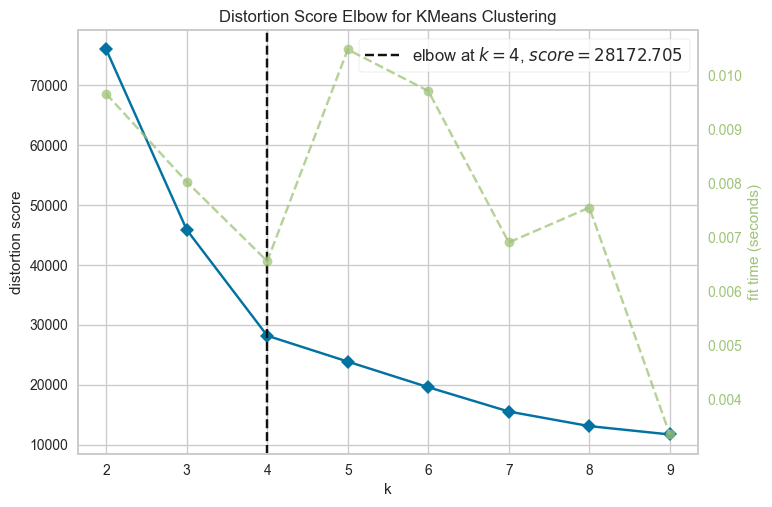

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [230]:
data = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()

* 연 소득과 쇼핑몰 점수의 적정 클러스터 개수는 5개

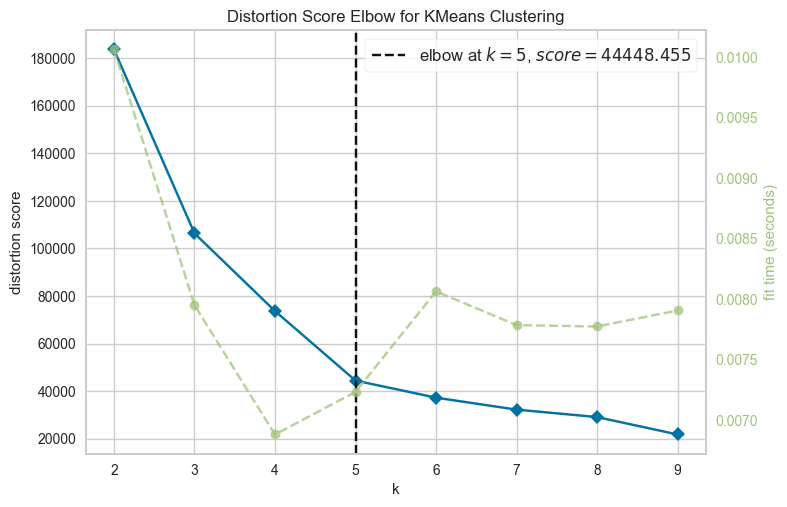

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [233]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()

* 나이, 연소득, 쇼핑몰 점수의 클러스터 개수는 4개

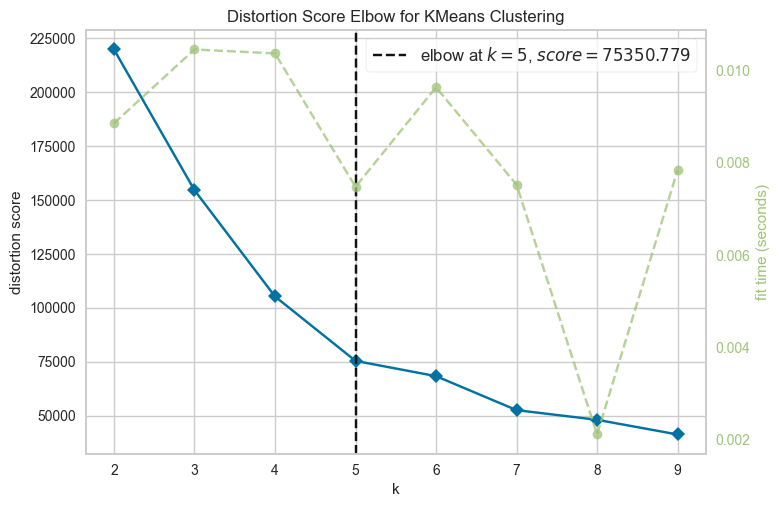

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [235]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data)
visualizer.show()

* 나이와 쇼핑몰 점수로 세분화한 고객 클러스터링

In [237]:
data = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values
algorithm = KMeans(n_clusters=4)
algorithm.fit(data)
labels1 = algorithm.labels_
df['label1'] = labels1
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3
5,6,Female,22,17,76,1
6,7,Female,35,18,6,2
7,8,Female,23,18,94,1
8,9,Male,64,19,3,2
9,10,Female,30,19,72,1


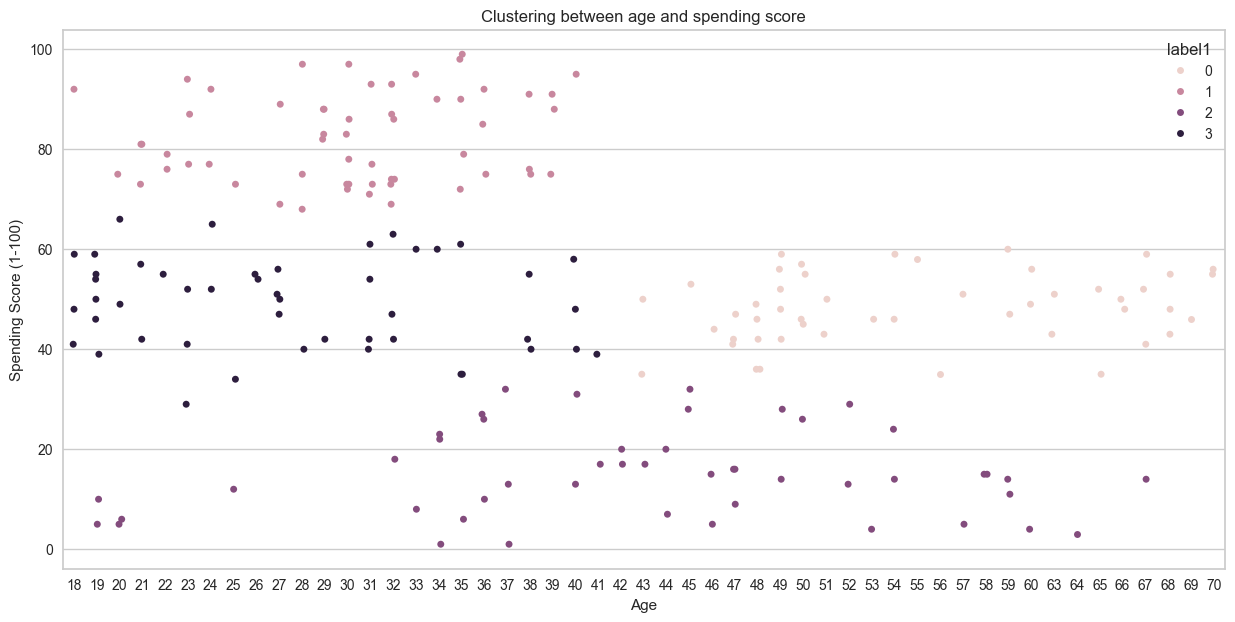

In [238]:
plt.figure(figsize=(15, 7))
sns.stripplot(x='Age', y='Spending Score (1-100)', data=df, hue='label1', jitter=True)
plt.title("Clustering between age and spending score")0
plt.show()

* 연 소득과 쇼핑몰 점수로 세분화한 고객 클러스터링

In [240]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

algorithm = KMeans(n_clusters=5)
algorithm.fit(data)
labels2 = algorithm.labels_
df['label2'] = labels2
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1,label2
0,1,Male,19,15,39,3,4
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,2,4
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,3,4
5,6,Female,22,17,76,1,1
6,7,Female,35,18,6,2,4
7,8,Female,23,18,94,1,1
8,9,Male,64,19,3,2,4
9,10,Female,30,19,72,1,1


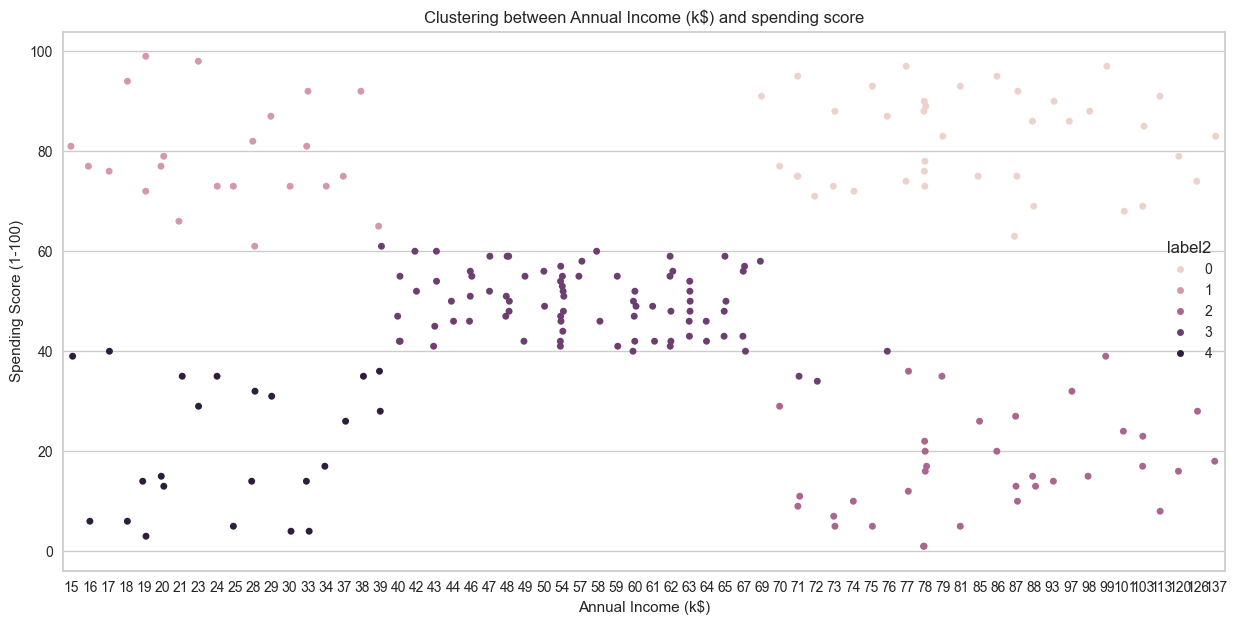

In [241]:
plt.figure(figsize=(15, 7))
sns.stripplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='label2', jitter=True)
plt.title("Clustering between Annual Income (k$) and spending score")
plt.show()

* 나이와 연 소득, 쇼핑몰 점수를 기준으로 클러스터링

In [243]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

algorithm = KMeans(n_clusters=5)
algorithm.fit(data)
labels3 = algorithm.labels_
df['label3'] = labels3
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label1,label2,label3
0,1,Male,19,15,39,3,4,3
1,2,Male,21,15,81,1,1,3
2,3,Female,20,16,6,2,4,1
3,4,Female,23,16,77,1,1,3
4,5,Female,31,17,40,3,4,1
5,6,Female,22,17,76,1,1,3
6,7,Female,35,18,6,2,4,1
7,8,Female,23,18,94,1,1,3
8,9,Male,64,19,3,2,4,1
9,10,Female,30,19,72,1,1,3


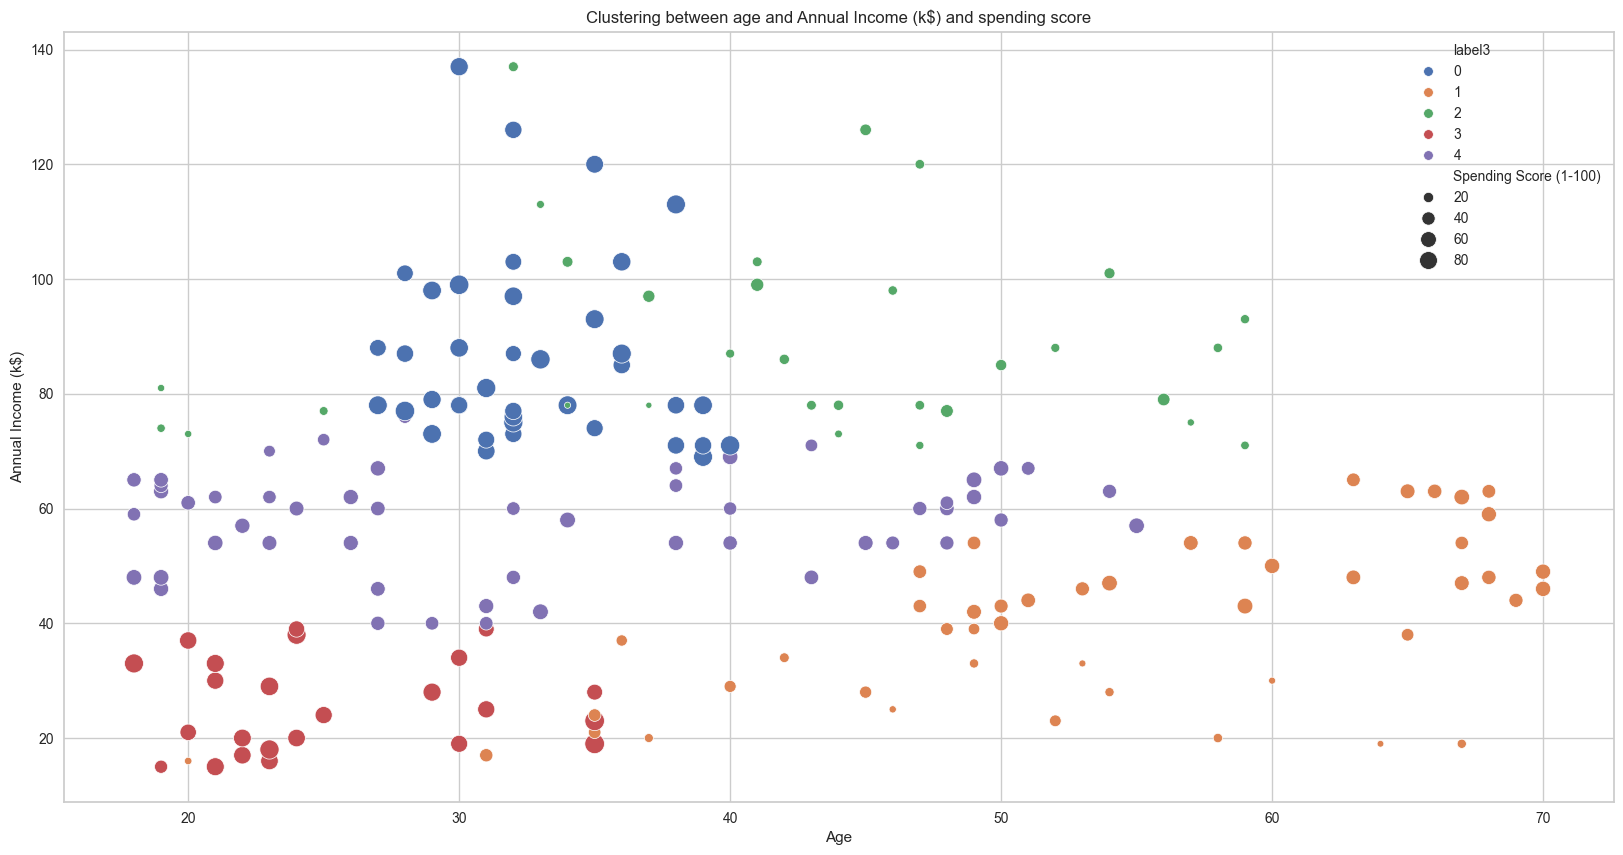

In [244]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='label3', size='Spending Score (1-100)', palette='deep', sizes=(20, 200))
plt.title("Clustering between age and Annual Income (k$) and spending score")
plt.show()

In [245]:
algorithm.predict([[19, 15, 39]])
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values

df['label3_pred'] = algorithm.predict(data)
df[['label3', 'label3_pred']]

,label3,label3_pred
0,3,3
1,3,3
2,1,1
3,3,3
4,1,1
...,...,...
195,0,0
196,2,2
197,0,0
198,2,2


## hierarchical clustering 군집화

In [248]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./data/Mall_Customers.csv")
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
data.shape

(200, 3)

In [249]:
data[:3]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6]])

Text(0, 0.5, 'Euclidean distances')

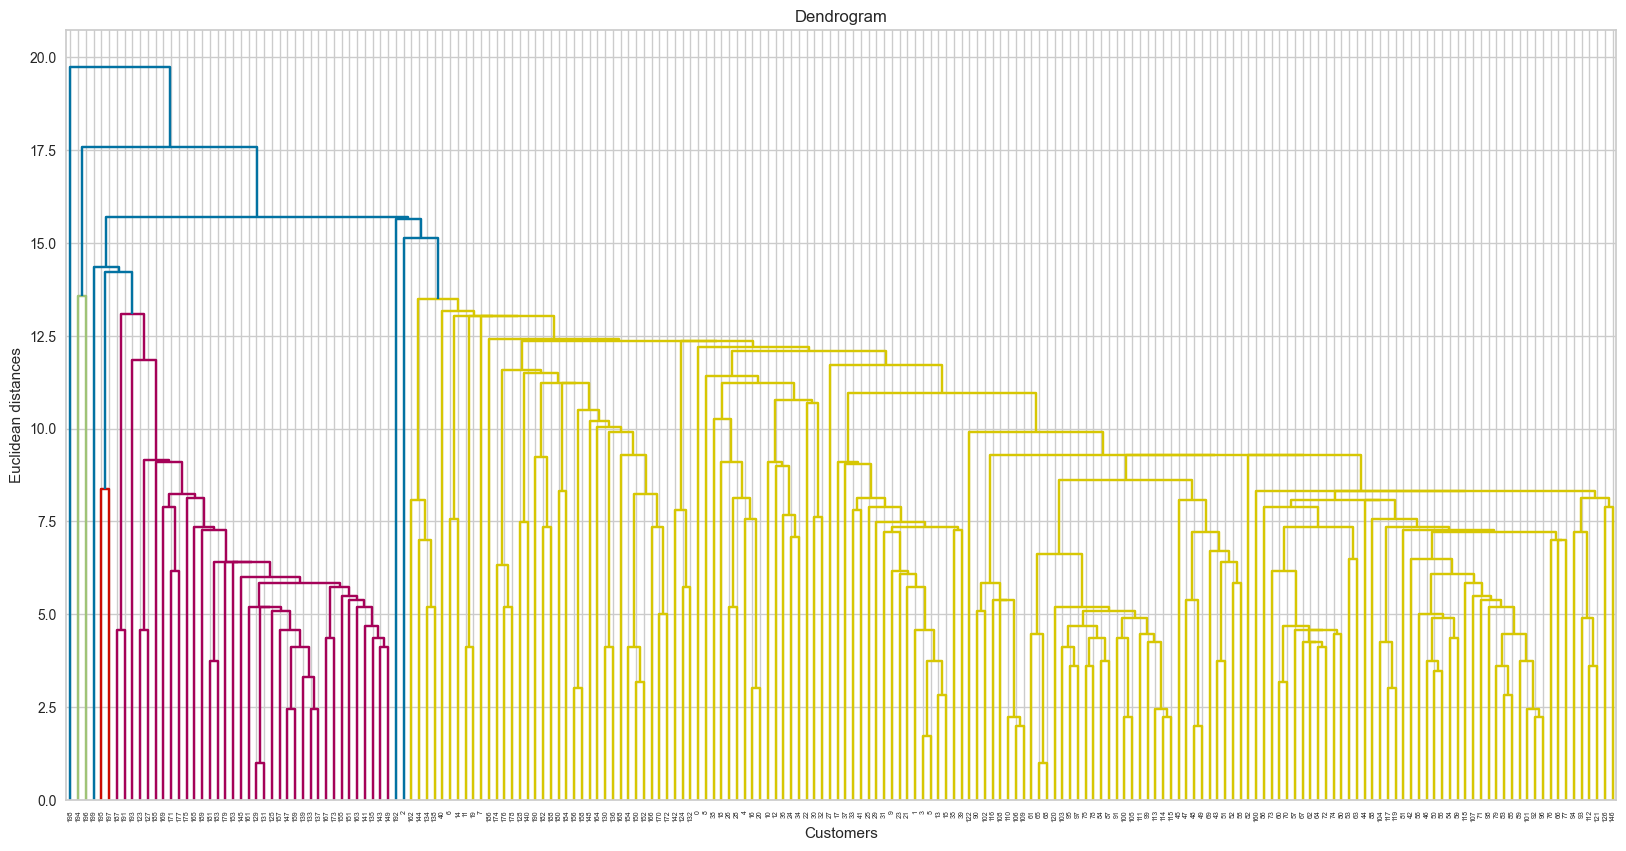

In [250]:
plt.figure(figsize=(20, 10))
cluster = linkage(data, method='single')
dendrogram=dendrogram(cluster)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")

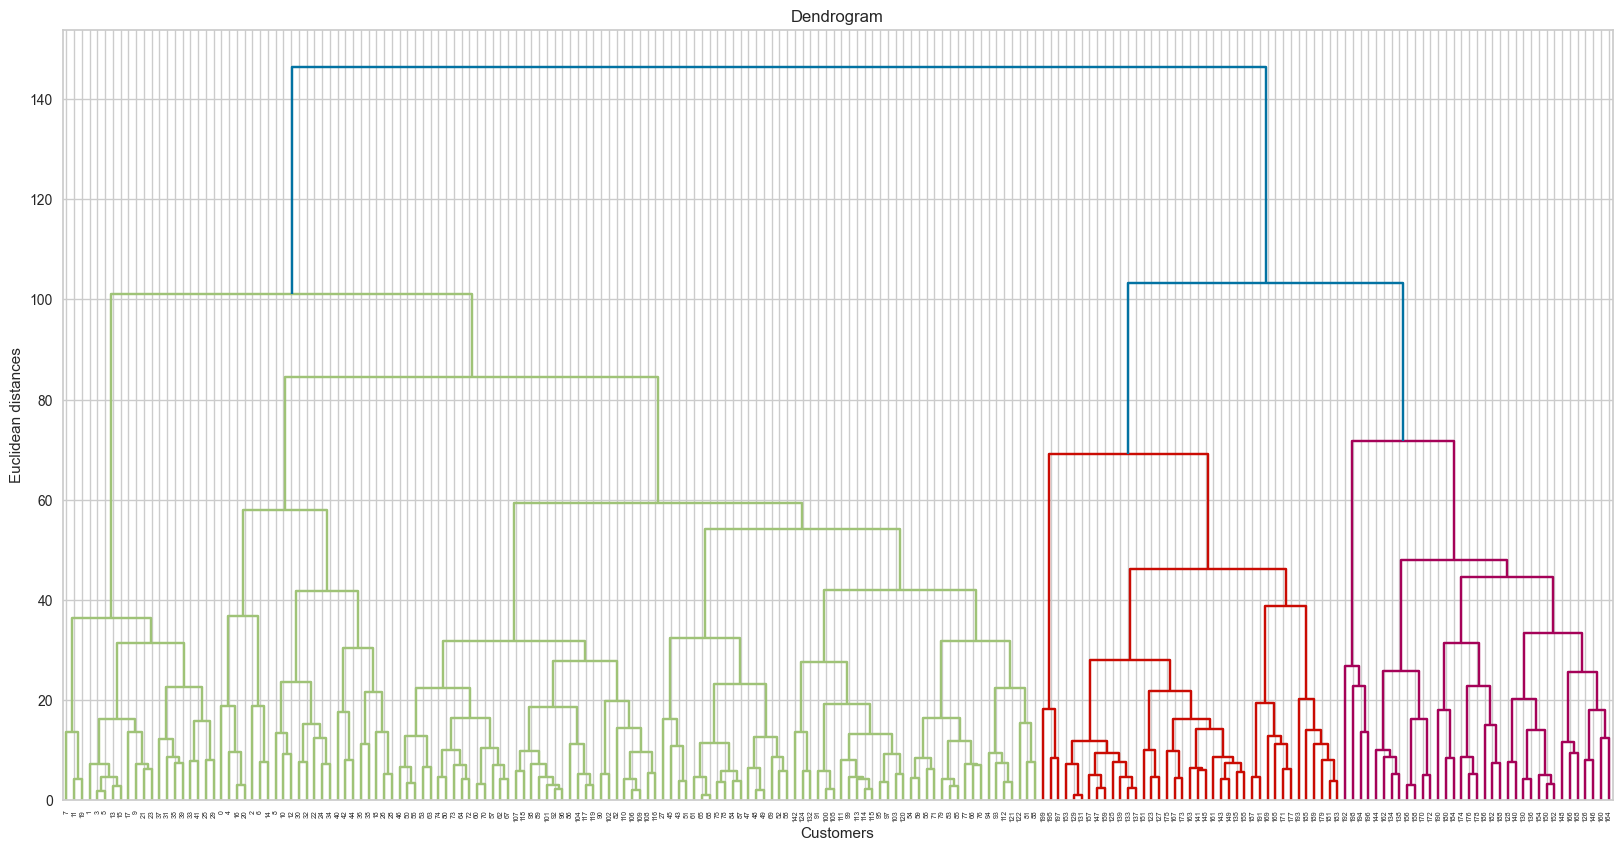

In [251]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 커널을 재시작하지 않고도 해결하는 방법
plt.figure(figsize=(20, 10))
cluster = linkage(data, method='complete')
dendro_plot = dendrogram(cluster)  # 'dendro' 대신 'dendro_plot' 사용
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

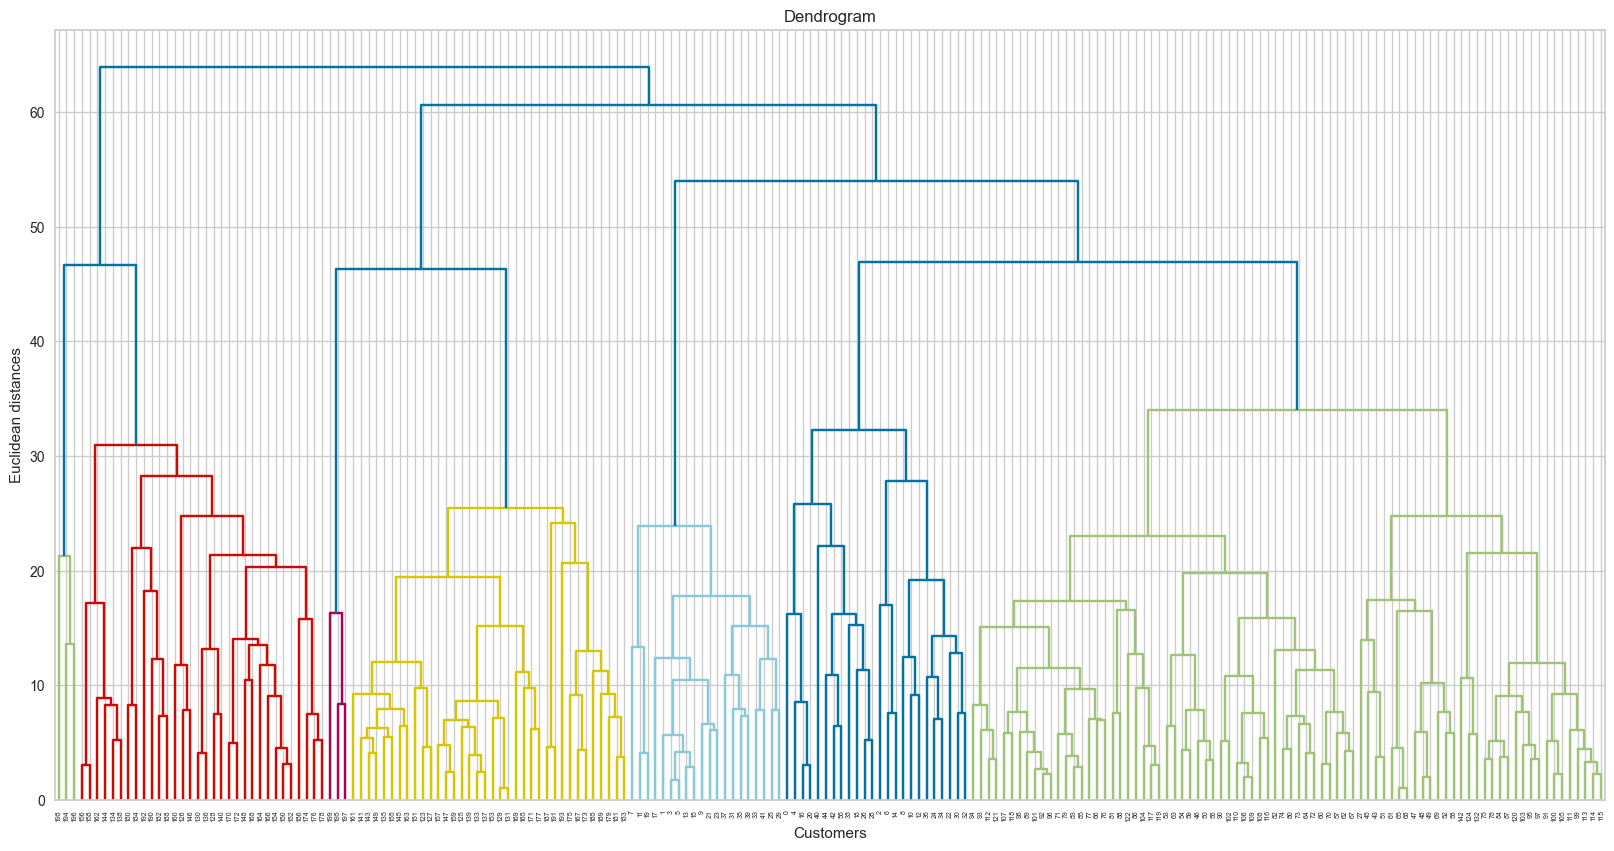

In [252]:
plt.figure(figsize=(20, 10))
cluster = linkage(data, method='average')
dendro_plot = dendrogram(cluster)  # 'dendro' 대신 'dendro_plot' 사용
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

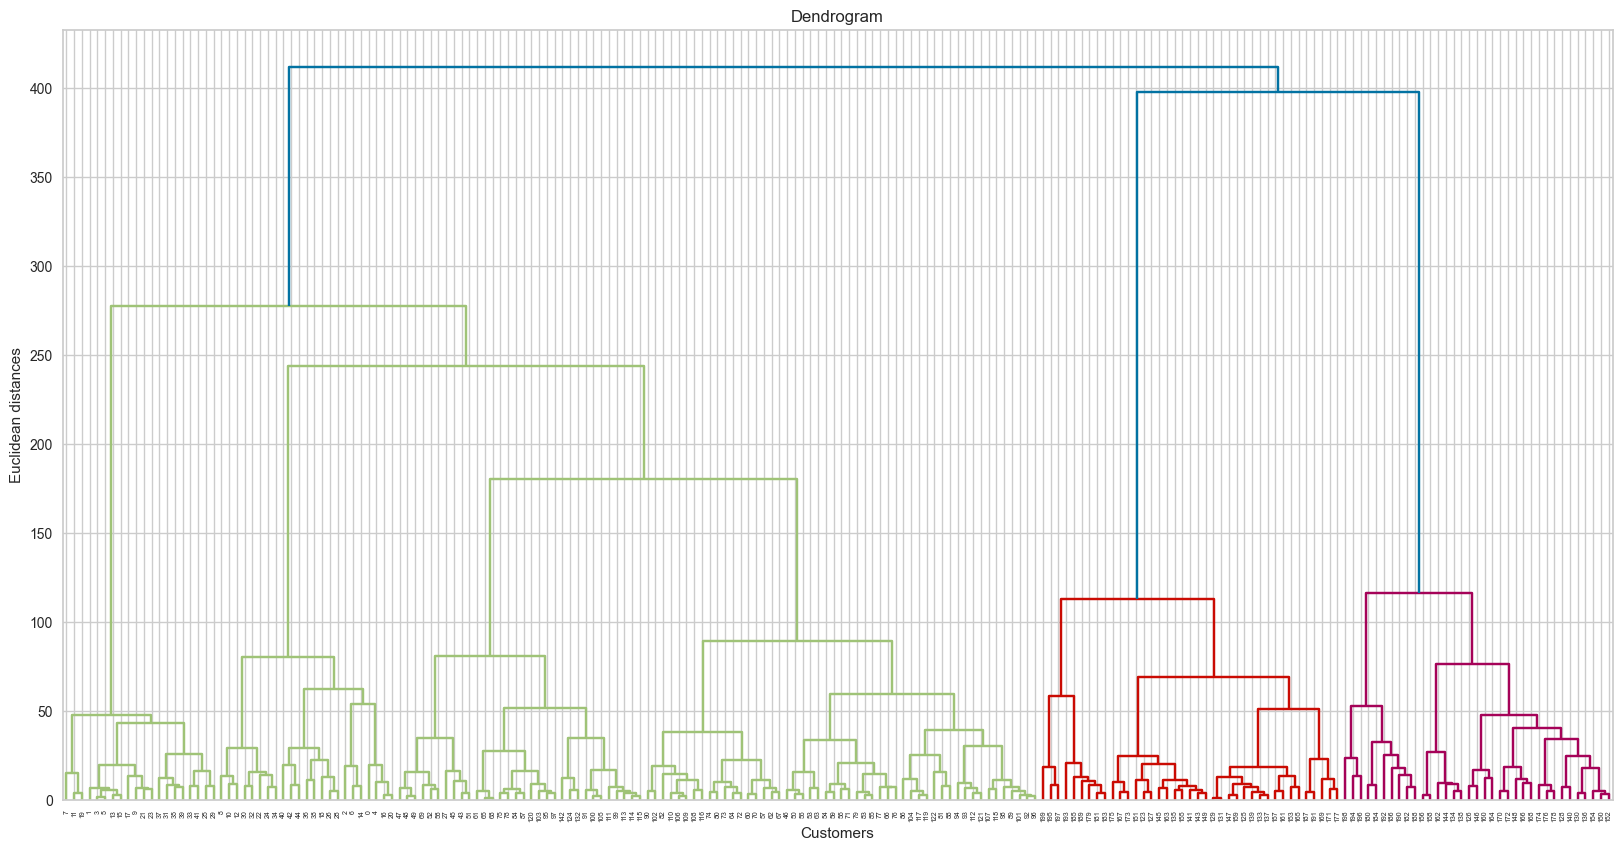

In [253]:
plt.figure(figsize=(20, 10))
cluster = linkage(data, method='ward')
dendro_plot = dendrogram(cluster)  # 'dendro' 대신 'dendro_plot' 사용
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [254]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
cluster_label = cluster_model.fit_predict(data)
df['label4'] = cluster_label
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label4
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


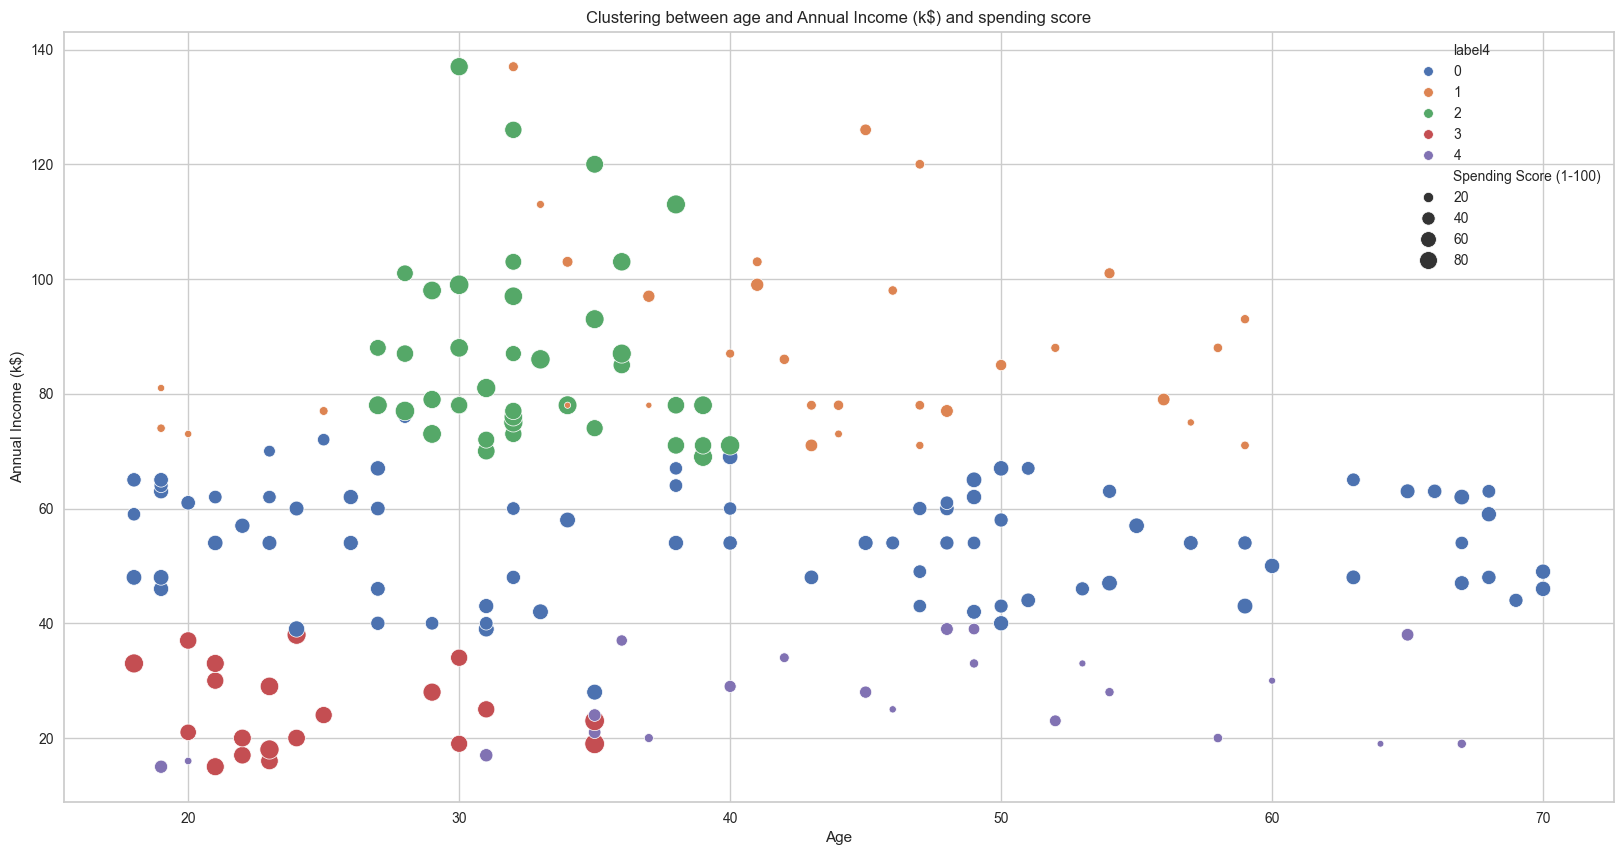

In [255]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='label4', size='Spending Score (1-100)', palette='deep', sizes=(20, 200))
plt.title("Clustering between age and Annual Income (k$) and spending score")
plt.show()